In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-email-dataset/emails.csv
/kaggle/input/iriscsv/Iris.csv


In [ ]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(df['Species'])
df['Species'] = le.transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
df.drop(columns=['Id'],inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=20)
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
51,6.4,3.2,4.5,1.5
130,7.4,2.8,6.1,1.9
55,5.7,2.8,4.5,1.3
134,6.1,2.6,5.6,1.4
37,4.9,3.1,1.5,0.1
...,...,...,...,...
22,4.6,3.6,1.0,0.2
75,6.6,3.0,4.4,1.4
137,6.4,3.1,5.5,1.8
15,5.7,4.4,1.5,0.4


In [ ]:
Y_train

51     1
130    2
55     1
134    2
37     0
      ..
22     0
75     1
137    2
15     0
99     1
Name: Species, Length: 112, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import f1_score,classification_report
Y_pred = model.predict(X_test)
f1_score(Y_test,Y_pred,average='weighted')


0.9473684210526315

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



KNeighborsClassifier(n_neighbors=5, *, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski", metric_params=None, n_jobs=None)

In [ ]:
list_f1 = []
optimal_f1_score = 0
model_number = 0
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    f1 = f1_score(Y_test,Y_pred,average='weighted')
    if f1 > optimal_f1_score:
        optimal_f1_score = f1
        model_number = i
    list_f1.append(f1)


In [ ]:
list_f1

[0.8934609250398724,
 0.8934609250398724,
 0.9206975459638602,
 0.9206975459638602,
 0.9473684210526315,
 0.9467304625199362,
 0.9735658486546201,
 0.9467304625199362,
 0.9735658486546201,
 0.9735658486546201]

In [ ]:
optimal_f1_score

0.9735658486546201

In [ ]:
model_number

7

In [ ]:
model = [i for i in range(1,11)]
model

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
metric_dataframe = pd.DataFrame(columns=['K_Size','F1_Score','Dataset'])
metric_dataframe

,K_Size,F1_Score,Dataset


In [ ]:
metric_dataframe['K_Size'] = model
metric_dataframe['F1_Score'] = list_f1
metric_dataframe['Dataset'] = 'Iris'
metric_dataframe

,K_Size,F1_Score,Dataset
0,1,0.893461,Iris
1,2,0.893461,Iris
2,3,0.920698,Iris
3,4,0.920698,Iris
4,5,0.947368,Iris
5,6,0.946730,Iris
6,7,0.973566,Iris
7,8,0.946730,Iris
8,9,0.973566,Iris
9,10,0.973566,Iris


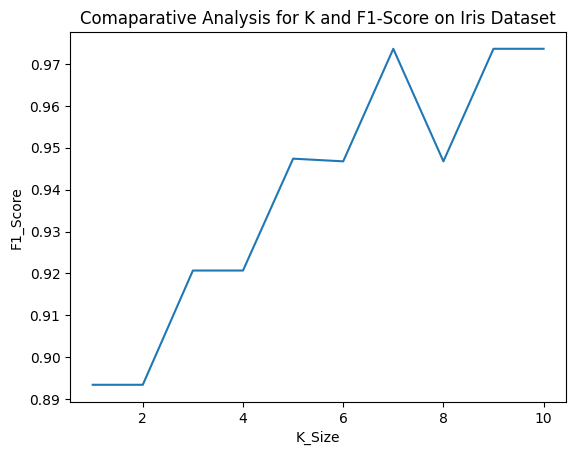

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=metric_dataframe,x='K_Size',y='F1_Score')
plt.title('Comaparative Analysis for K and F1-Score on Iris Dataset')
plt.show()

In [ ]:
df2  =pd.read_csv('/kaggle/input/spam-email-dataset/emails.csv')
df2.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectors=vectorizer.fit_transform(df2['text'])
print(vectors.shape)
features=vectors

(5728, 37303)


In [ ]:
import scipy.sparse
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(features)


# convert the sparse matrix to a dense matrix
dense_matrix = sparse_matrix.to_numpy()

In [ ]:
new_col = []
for i in range(0,37303):
    s = f'Feature_{i+1}'
    new_col.append(s)

In [ ]:
new_df1 = pd.DataFrame(dense_matrix,columns=new_col)
new_df1

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_37294,Feature_37295,Feature_37296,Feature_37297,Feature_37298,Feature_37299,Feature_37300,Feature_37301,Feature_37302,Feature_37303
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5724,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5725,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_col = []
for i in range(0,1000):
    s = f'Feature_{i+1}'
    new_col.append(s)

In [ ]:
new_updated_df1 = pd.DataFrame(new_df1,columns=new_col)

In [ ]:
new_updated_df1['spam'] = df2['spam']

In [ ]:
from sklearn.model_selection import train_test_split
X = new_df1.iloc[:,0:-1]
Y = new_df1.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.20)

In [ ]:
list_f1 = []
optimal_f1_score = 0
model_number = 0
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    f1 = f1_score(Y_test,Y_pred,average='weighted')
    if f1 > optimal_f1_score:
        optimal_f1_score = f1
        model_number = i
    list_f1.append(f1)

In [ ]:
metric_dataframe = pd.DataFrame(columns=['K_Size','F1_Score','Dataset'])
metric_dataframe

,K_Size,F1_Score,Dataset


In [ ]:
model = [i for i in range(1,11)]
model

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
metric_dataframe['K_Size'] = model
metric_dataframe['F1_Score'] = list_f1
metric_dataframe['Dataset'] = 'Ham vs Spam'
metric_dataframe

,K_Size,F1_Score,Dataset
0,1,0.998255,Ham vs Spam
1,2,0.998691,Ham vs Spam
2,3,0.998691,Ham vs Spam
3,4,0.998691,Ham vs Spam
4,5,0.998691,Ham vs Spam
5,6,0.998691,Ham vs Spam
6,7,0.998691,Ham vs Spam
7,8,0.998691,Ham vs Spam
8,9,0.998691,Ham vs Spam
9,10,0.998691,Ham vs Spam


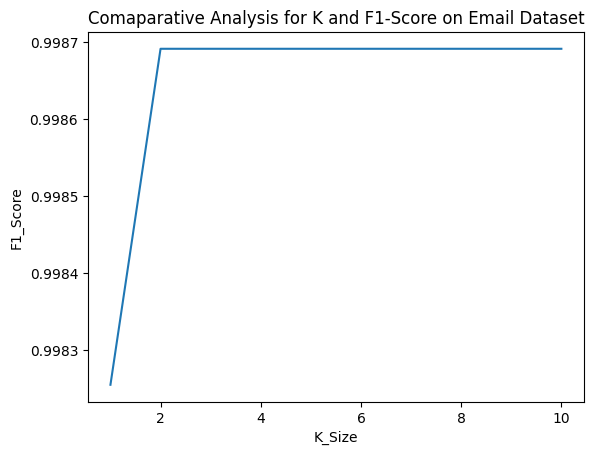

In [ ]:
sns.lineplot(data=metric_dataframe,x='K_Size',y='F1_Score')
plt.title('Comaparative Analysis for K and F1-Score on Email Dataset')
plt.show()